In [1]:
p168_data <- read.table("http://www1.aucegypt.edu/faculty/hadi/RABE5/Data5/P168.txt", header = TRUE)
str(p168_data)

'data.frame':	15 obs. of  2 variables:
 $ t  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ N_t: int  355 211 197 166 142 106 104 60 56 38 ...


In [3]:
p168_data

t,N_t
1,355
2,211
3,197
4,166
5,142
6,106
7,104
8,60
9,56
10,38


In [18]:
p168_reg <- lm(N_t ~ t, p168_data)
summary(p168_reg)


Call:
lm(formula = N_t ~ t, data = p168_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.867 -23.599  -9.652  10.223 114.883 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   259.58      22.73  11.420 3.78e-08 ***
t             -19.46       2.50  -7.786 3.01e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 41.83 on 13 degrees of freedom
Multiple R-squared:  0.8234,	Adjusted R-squared:  0.8098 
F-statistic: 60.62 on 1 and 13 DF,  p-value: 3.006e-06


In [29]:
library(ggplot2)
library(gridExtra)

ggplotReg <- function (fit, data, a, b, title, type) {

    p <- ggplot(data, aes_string(x = a, y = b)) + 
    geom_point() +
    ggtitle(title)  + # Title 이름 설정 후
    theme(plot.title = element_text(size = 10,
                                    face = "bold",
                                    color = "blue",
                                    hjust = 0.5))# 원하는 테마 입히기.
    if( type == 0 ) {
        p <- p + 
        geom_abline(intercept = fit$coefficients[1],
                        slope = fit$coefficient[2],
                        color = 'red', size = 1)
    } else {
        p <- p + 
        geom_smooth(method = "loess", fill="magenta1") +
        geom_smooth(method = "lm", col = "red", fill = "lawngreen")
    }
    p + 
    labs(subtitle = sprintf("Intercept [%f], slope [%f]",
                           fit$coefficients[1],
                           fit$coefficients[2]))
}

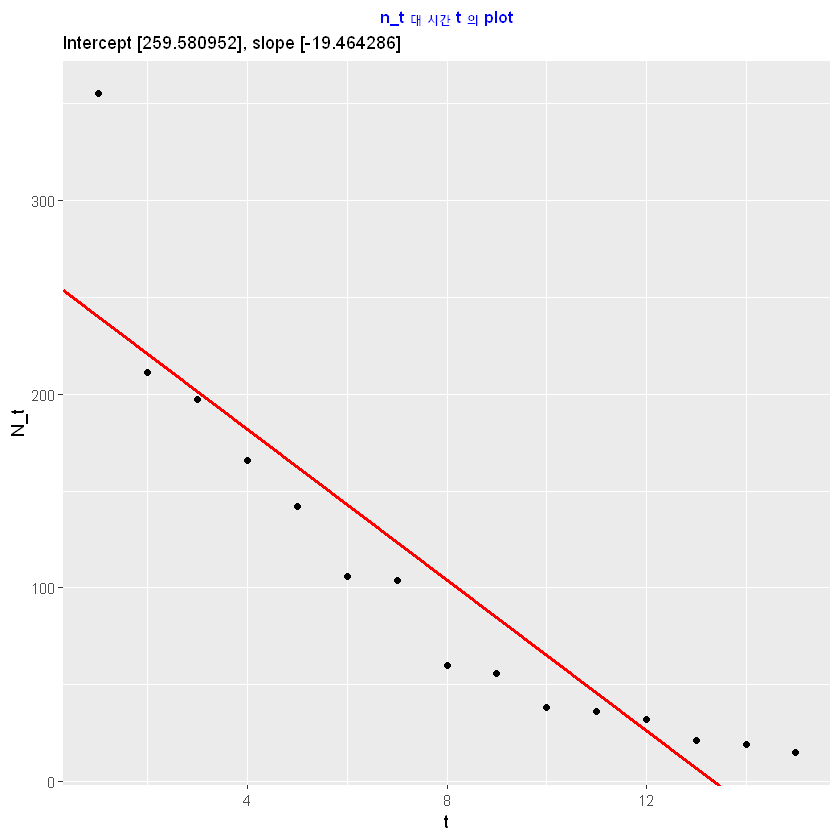

In [30]:
ggplotReg(p168_reg, p168_data, "t", "N_t", 'n_t 대 시간 t 의 plot', 0)

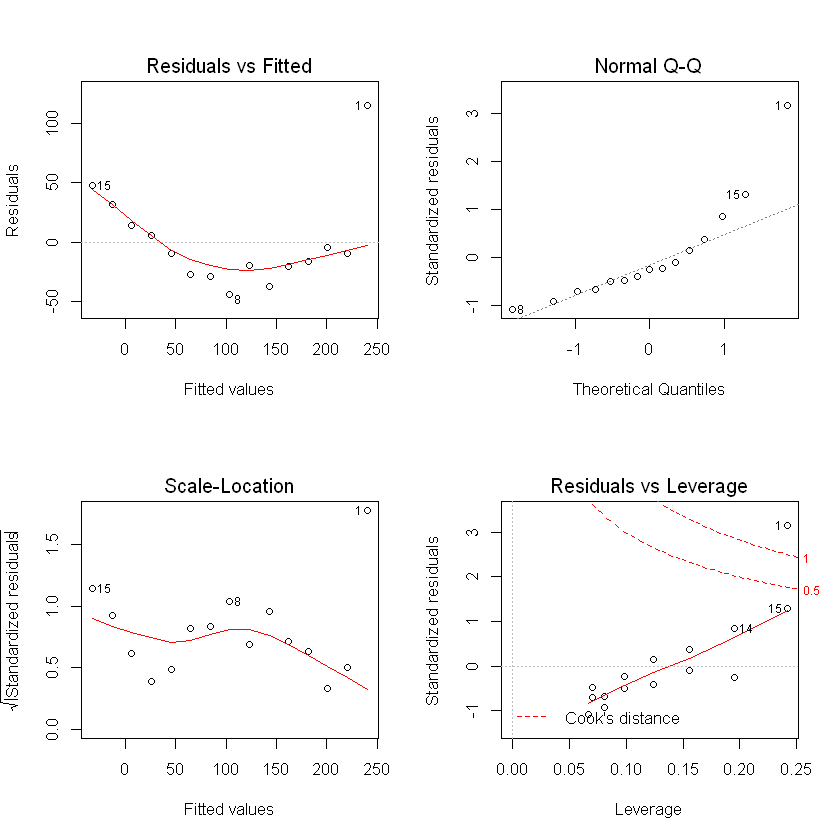

In [31]:
par(mfrow = c(2,2))
plot(p168_reg)

In [32]:
p168_log_reg <- lm(log(N_t) ~ t, p168_data)
summary(p168_log_reg)


Call:
lm(formula = log(N_t) ~ t, data = p168_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.18445 -0.06189  0.01253  0.05201  0.20021 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.973160   0.059778   99.92  < 2e-16 ***
t           -0.218425   0.006575  -33.22 5.86e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.11 on 13 degrees of freedom
Multiple R-squared:  0.9884,	Adjusted R-squared:  0.9875 
F-statistic:  1104 on 1 and 13 DF,  p-value: 5.86e-14


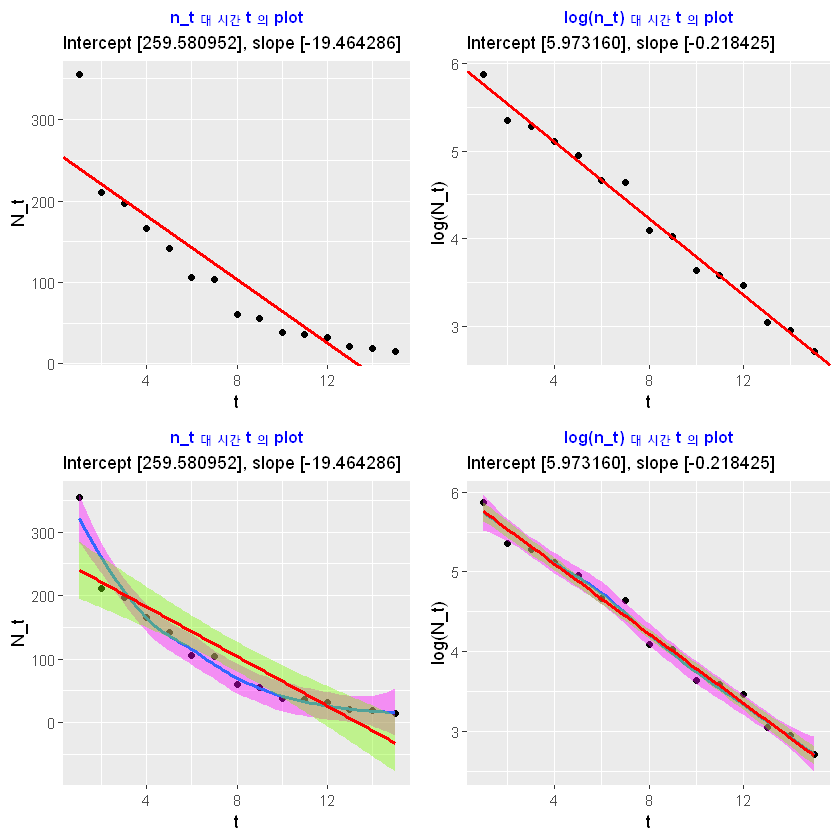

In [38]:
p1 <- ggplotReg(p168_reg, p168_data, "t", "N_t", 'n_t 대 시간 t 의 plot', 0)
p2 <- ggplotReg(p168_log_reg, p168_data, "t", "log(N_t)", 'log(n_t) 대 시간 t 의 plot', 0)
p3 <- ggplotReg(p168_reg, p168_data, "t", "N_t", 'n_t 대 시간 t 의 plot', 1)
p4 <- ggplotReg(p168_log_reg, p168_data, "t", "log(N_t)", 'log(n_t) 대 시간 t 의 plot', 2)
grid.arrange(p1, p2, p3, p4, ncol=2, nrow=2)

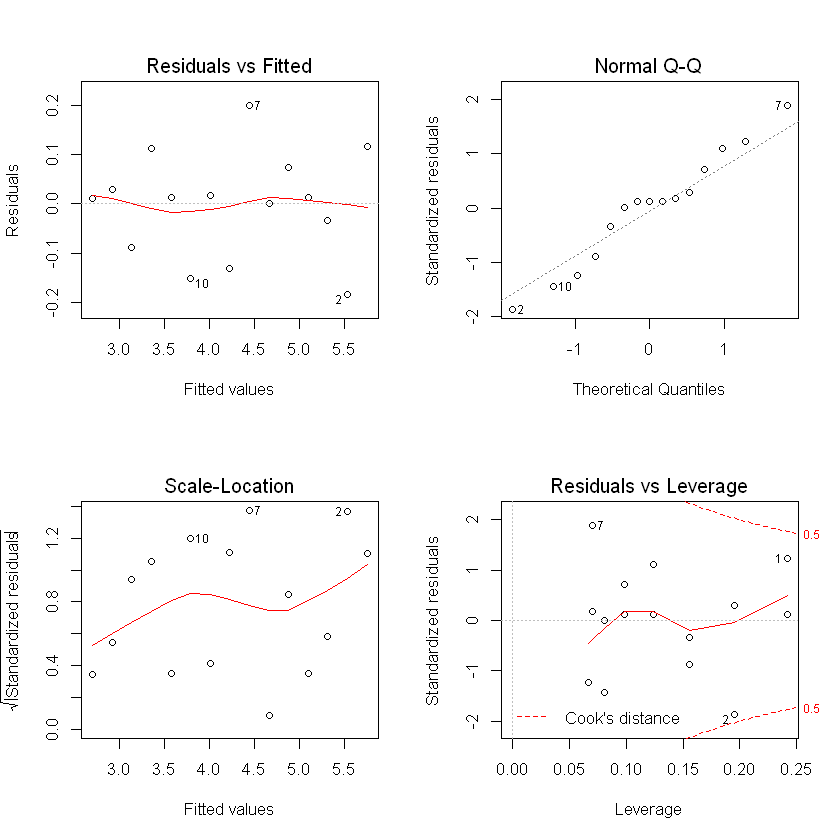

In [37]:
par(mfrow = c(2,2))
plot(p168_log_reg)

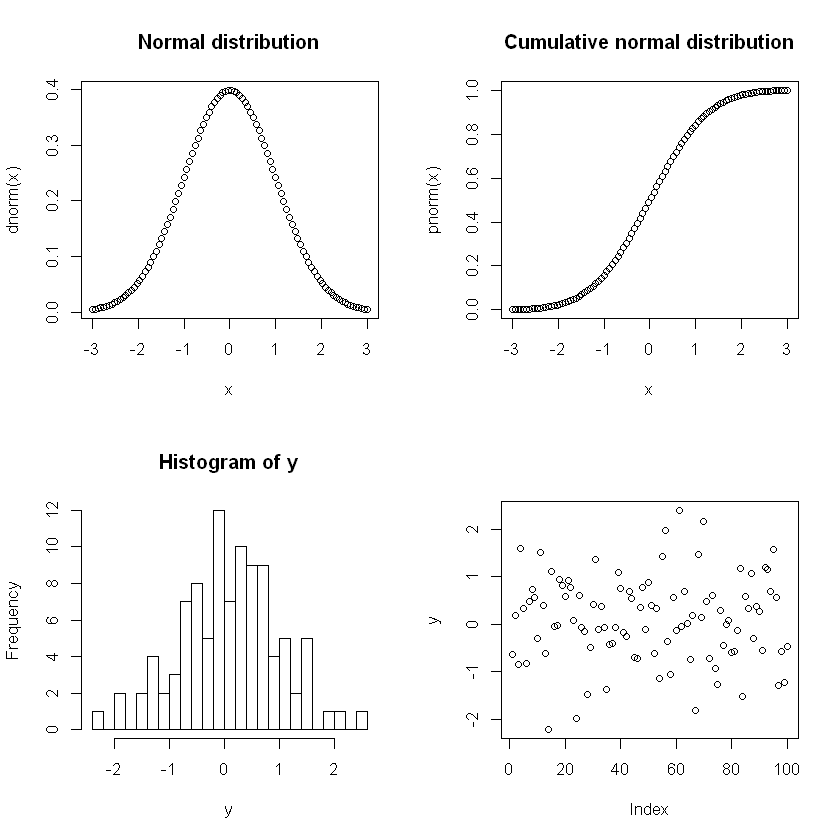

In [68]:
par(mfrow = c(2,2))
x <- seq(-3, 3, length=100)
plot(x, dnorm(x), main="Normal distribution") 
plot(x, pnorm(x), main="Cumulative normal distribution")

# Create a sample of 50 numbers which are normally distributed.
set.seed(1)
y <- rnorm(100, mean=0, sd=1)
hist(y, 20)
plot(y)

In [ ]:
### 변환에 대한 식 구조 ###

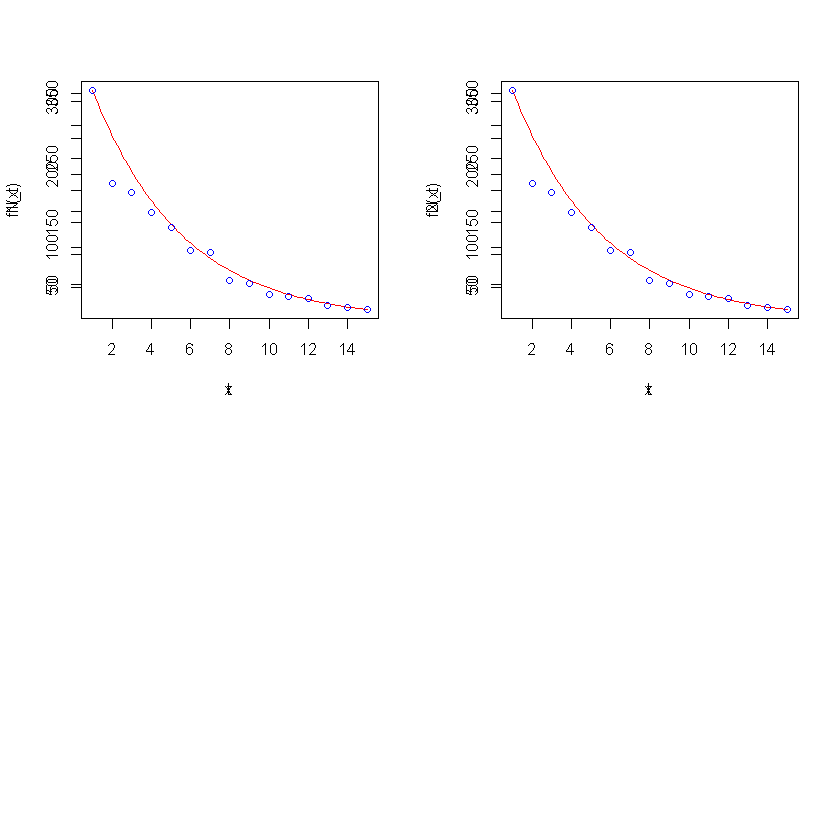

In [28]:
par(mfrow = c(2,2))
f1 <- function(t) 392.7448 * exp(-0.218 * t)
curve(f1, from = 1, to = 15, col="red")
par(new=TRUE)
plot(p168_data, col="blue")

f2 <- function(t) 391.98 * exp(-0.218 * t)
curve(f2, from = 1, to = 15, col="red")
par(new=TRUE)
plot(p168_data, col="blue")

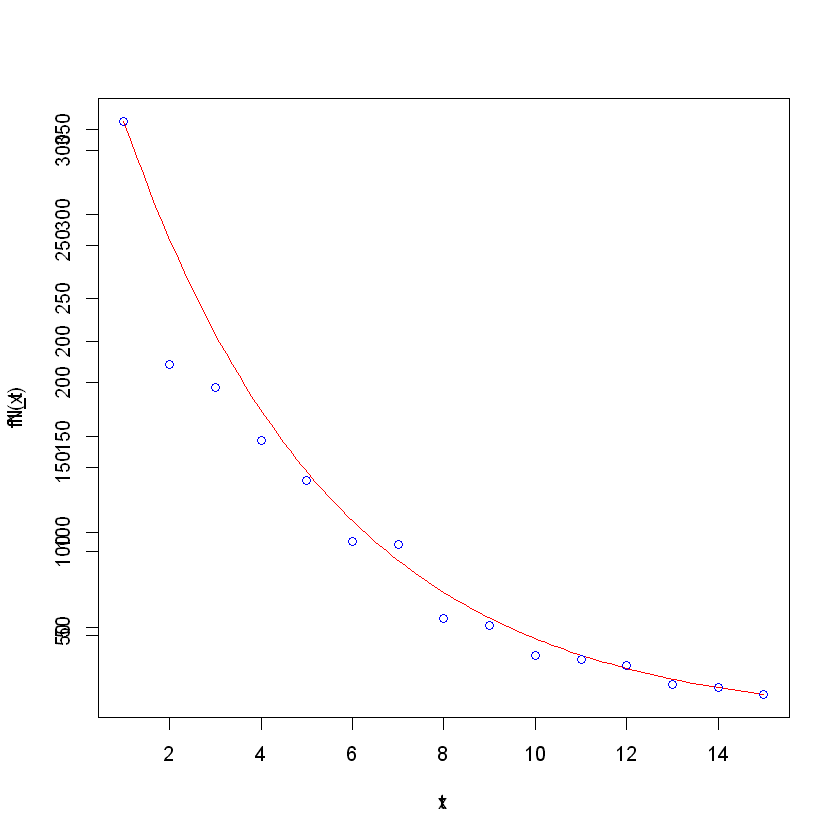

In [21]:
f1 <- function(t) 391.98 * exp(-0.218 * t)
curve(f1, from = 1, to = 15, col="red")
par(new=TRUE)
plot(p168_data, col="blue")